In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [3]:
plt.style.use("seaborn-whitegrid")
df = pd.read_csv(r"C:\Users\suyog\DataProcessing\data_set\autos.csv")
df.head()

C:\Users\suyog\AppData\Local\Temp\ipykernel_29584\2761338043.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


,symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9,111,5000,21,27,13495
1,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9,111,5000,21,27,16500
2,1,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9,154,5000,19,26,16500
3,2,audi,gas,std,4,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10,102,5500,24,30,13950
4,2,audi,gas,std,4,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8,115,5500,18,22,17450


In [4]:
 X = df.copy()
y = X.pop("price")

# Label encoding for categoricals
for colname in X.select_dtypes("object"):  #for each columns with "object"
    X[colname], _ = X[colname].factorize() #for categorical feature, factorize() is used.
                                           #"_" second variable capture the return value
# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = X.dtypes == int #create Boolean series called 'discrete_feature'

In [5]:
#mutual_info_regression is used to calculate mutual information scores for regression tasks.
#mutual_info_regression measure the dependency of X with y.
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    #X=feature matrix, y=target variable
    #discrete_features indicate which feature are considered discrete.
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    #mi_scores series if converted to pandas series with name is set to "MI Scores"
    mi_scores = mi_scores.sort_values(ascending=False)
    #mi_scores are sorted in to descending order
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
  # calculate and return MI scores for each feature with respect to target variable.
  # show a few features with their MI scores

In [11]:
print(mi_scores)

curb_weight          0.914062
engine_size          0.908922
highway_mpg          0.894645
horsepower           0.891217
city_mpg             0.789369
width                0.664609
length               0.615858
wheel_base           0.588795
bore                 0.480605
fuel_system          0.466031
stroke               0.385661
height               0.359345
drive_wheels         0.332922
num_of_cylinders     0.330713
make                 0.256009
peak_rpm             0.230427
symboling            0.229156
engine_type          0.157996
compression_ratio    0.106185
aspiration           0.087994
body_style           0.057591
fuel_type            0.048139
num_of_doors         0.012234
engine_location      0.000000
Name: MI Scores, dtype: float64


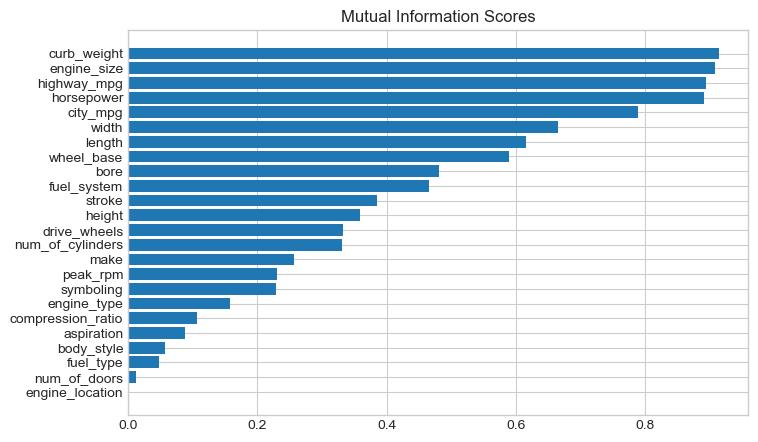

In [7]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

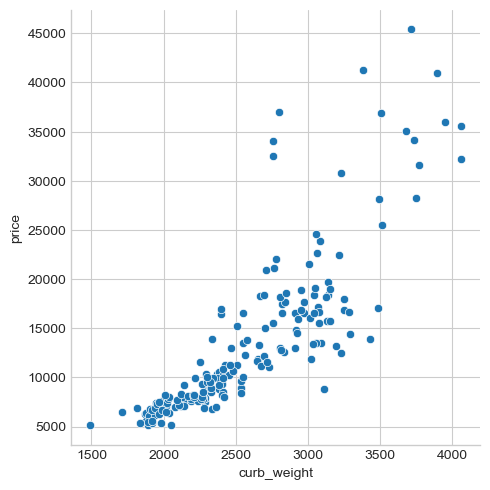

In [8]:
sns.relplot(x="curb_weight", y="price", data=df)

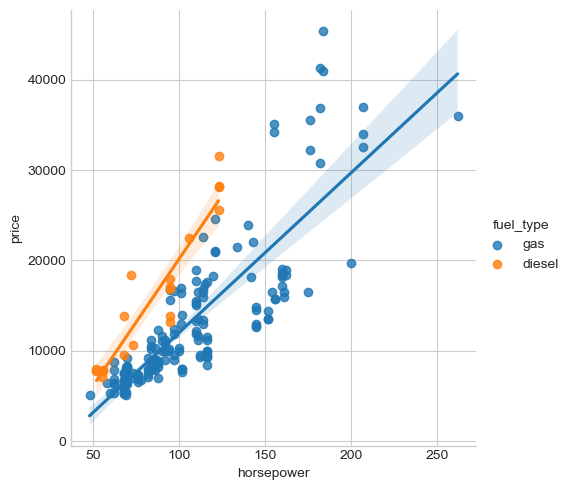

In [9]:
sns.lmplot(x="horsepower", y="price", hue="fuel_type", data=df);

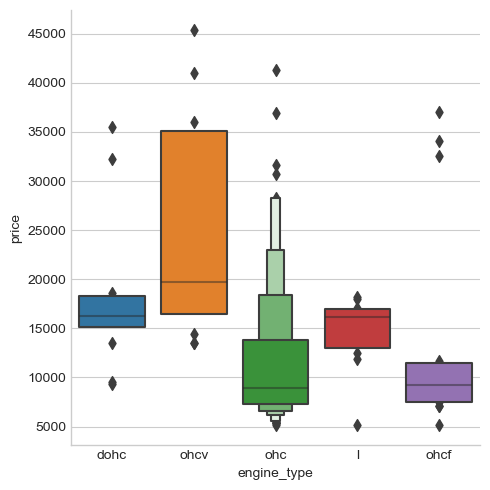

In [10]:
sns.catplot(x="engine_type", y="price", data=df, kind="boxen");